<a href="https://colab.research.google.com/github/sudhakaran1401/Projects-1/blob/main/Weather_prediction_using_machine_learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
! pip install prophet
from prophet import Prophet
from matplotlib import pyplot

from google.colab import files
files.upload()
df= read_csv('weathernew1.csv', header=0)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving weathernew1.csv to weathernew1 (1).csv


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxq3trnmb/m1ezheqb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxq3trnmb/t7fjb3ja.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36757', 'data', 'file=/tmp/tmpxq3trnmb/m1ezheqb.json', 'init=/tmp/tmpxq3trnmb/t7fjb3ja.json', 'output', 'file=/tmp/tmp9b_u31k7/prophet_model-20220830051216.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


          ds       yhat  yhat_lower  yhat_upper
0 1968-01-01  26.964176   20.712505   33.100962
1 1968-02-01  27.017266   20.067740   33.177662
2 1968-03-01  26.894602   20.446380   33.192324
3 1968-04-01  26.982461   20.687628   32.986979
4 1968-05-01  26.960904   20.805282   33.204289


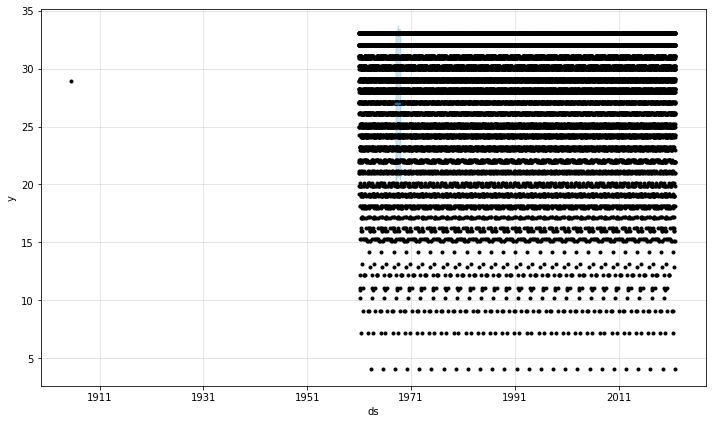

In [21]:
#df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# define the model
model = Prophet()
# fit the model
model.fit(df)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [22]:
l = list()
dt = input("Enter Date: ")
l.append(dt)
future_pred = DataFrame(l)
future_pred.columns = ['ds']
future_pred['ds']= to_datetime(future_pred['ds'])
prediction = model.predict(future_pred)
print("Prediction:", prediction)
print(prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

Enter Date: 14-07-2025
Prediction:           ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2025-07-14  26.979371   20.616354   33.591496    26.979369    26.979373   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        0.000534              0.000534              0.000534 -0.024336   

   weekly_lower  weekly_upper   yearly  yearly_lower  yearly_upper  \
0     -0.024336     -0.024336  0.02487       0.02487       0.02487   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   

   multiplicative_terms_upper       yhat  
0                         0.0  26.979905  
          ds       yhat  yhat_lower  yhat_upper
0 2025-07-14  26.979905   20.616354   33.591496


In [23]:
model = Prophet(weekly_seasonality=True)
model.fit(df);
model.weekly_seasonality

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxq3trnmb/76g49o7d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxq3trnmb/g3cyppgt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4290', 'data', 'file=/tmp/tmpxq3trnmb/76g49o7d.json', 'init=/tmp/tmpxq3trnmb/g3cyppgt.json', 'output', 'file=/tmp/tmprl5840az/prophet_model-20220830051241.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:12:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:12:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


True

In [24]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
22300,2023-07-31
22301,2023-08-31
22302,2023-09-30
22303,2023-10-31
22304,2023-11-30


In [25]:
forecast = model.predict(future)

In [26]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
22300,2023-07-31,26.978788,20.303766,33.219496,26.978788,26.978788,-0.028680,-0.028680,-0.028680,-0.024336,-0.024336,-0.024336,-0.004343,-0.004343,-0.004343,0.0,0.0,0.0,26.950109
22301,2023-08-31,26.978814,20.951981,33.156718,26.978813,26.978814,0.035980,0.035980,0.035980,0.018965,0.018965,0.018965,0.017015,0.017015,0.017015,0.0,0.0,0.0,27.014794
22302,2023-09-30,26.978838,21.168609,33.413081,26.978838,26.978838,0.071168,0.071168,0.071168,0.007993,0.007993,0.007993,0.063176,0.063176,0.063176,0.0,0.0,0.0,27.050006
22303,2023-10-31,26.978863,20.807058,33.561490,26.978863,26.978864,-0.065778,-0.065778,-0.065778,0.000926,0.000926,0.000926,-0.066704,-0.066704,-0.066704,0.0,0.0,0.0,26.913086
22304,2023-11-30,26.978888,20.521028,33.502178,26.978887,26.978888,0.019740,0.019740,0.019740,0.018965,0.018965,0.018965,0.000774,0.000774,0.000774,0.0,0.0,0.0,26.998627


In [27]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
22300,2023-07-31,26.950109,20.303766,33.219496
22301,2023-08-31,27.014794,20.951981,33.156718
22302,2023-09-30,27.050006,21.168609,33.413081
22303,2023-10-31,26.913086,20.807058,33.561490
22304,2023-11-30,26.998627,20.521028,33.502178


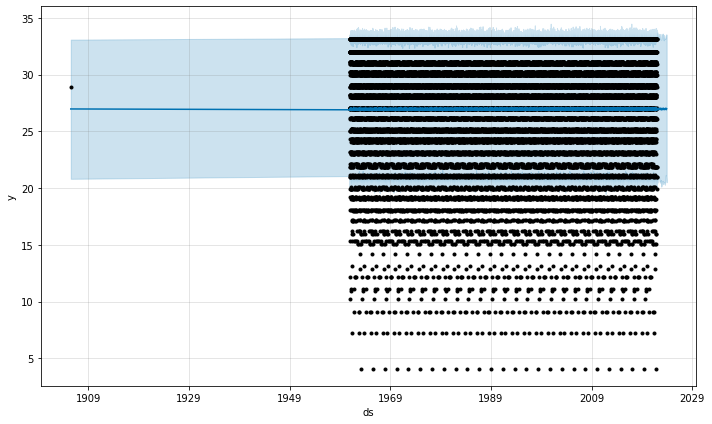

In [28]:
model.plot(forecast);

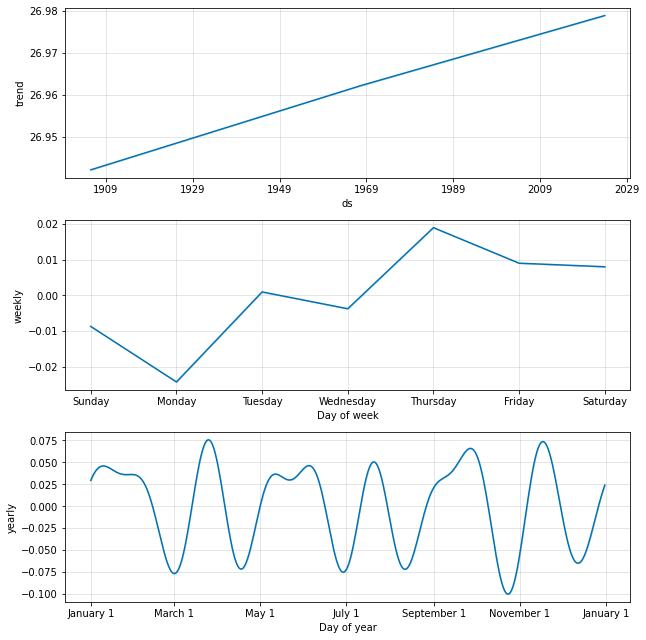

In [29]:
model.plot_components(forecast);

In [30]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [31]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()

In [32]:
metric_df.tail()

,ds,yhat,y
22300,2023-07-31,26.950109,NaN
22301,2023-08-31,27.014794,NaN
22302,2023-09-30,27.050006,NaN
22303,2023-10-31,26.913086,NaN
22304,2023-11-30,26.998627,NaN


In [33]:
metric_df.dropna(inplace=True)

In [34]:
print(metric_df.ds,metric_df.y)

0       1905-07-13
1       1960-12-06
2       1960-12-07
3       1960-12-08
4       1960-12-09
           ...    
22276   2021-12-02
22277   2021-12-03
22278   2021-12-04
22279   2021-12-05
22280   2021-12-06
Name: ds, Length: 22281, dtype: datetime64[ns] 0        28.9
1        25.0
2        33.1
3        31.1
4        28.2
         ... 
22276    21.9
22277    21.0
22278    28.9
22279    26.1
22280    33.1
Name: y, Length: 22281, dtype: float64


In [35]:
metric_df.tail()

,ds,yhat,y
22276,2021-12-02,26.976785,21.9
22277,2021-12-03,26.958971,21.0
22278,2021-12-04,26.950684,28.9
22279,2021-12-05,26.927304,26.1
22280,2021-12-06,26.905828,33.1


In [36]:
from sklearn.metrics import r2_score
r2_score(metric_df.y, metric_df.yhat)

9.837525823208626e-05

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(metric_df.y, metric_df.yhat)

24.72533181081623